<div class="alert alert-block alert-warning">

# <p style="text-align: center;">Lab 3 (Weeks 5,6): Multi-Layer Perceptrons (MLP) </p>

<img src="https://viso.ai/wp-content/uploads/2021/04/multilayer-perceptrons-MLP-concept-1.jpg" width="400" height="200" />

<!-- ![linear-vs-logistic-regression--medium](https://miro.medium.com/max/1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg) -->

Welcome to your third lab of ECE4179! Labs in this unit will run as a help desk and they are not mandatory to attend. As a reminder, this lab can be completed in pairs but you and your partner need to register via the google forms on Moodle under week 5.

The two notebooks provided contain all the code and comments that you need to submit. Feel free to add in your own markdown for additional comments. After completion, You need to submit both Jupyter Notebooks (.ipynb file) to Moodle. Make sure you run the Notebooks before submitting and all outputs are visible.

In this Lab, you will find three tasks distributed across two notebooks: Sinusoidal and CoverType. These tasks will guide you through to learn using a deep learning framework (Pytorch lightning) for MLP based problems. These knowledge and skills will be essential for lab 4 and assignment, and in general, critical to get you prepared to enter the deep learning world.

- <b>Task 1:</b> Shallow MLP to fit MLP into a sinusoidal function
- <b>Task 2:</b> Shallow MLP for multiclass classification of the Covertype dataset
- <b>Task 3:</b> Deep MLP for multiclass classification of the Covertype dataset

Each task will contain code to complete, and worded questions, so ensure you complete both before submitting.

Good luck with the Lab!

__Submission details:__
- __Make sure you have run all your cells from top to bottom (you can click _Kernel_ and _Restart Kernel and Run All Cells_).__ </br>
- __Submit the Jupyter Notebooks (Lab3\_1\_Sinusoidal.ipynb) and (Lab3\_2\_CoverType.ipynb).__
- __Outputs must be visible upon submission. We will also be re-running your code__

<b>Enter your student details below</b>

- <b>Student Name:</b> Lucas Liu
- <b>Student ID:</b> 31445179

If you have a partner:
- <b>Second Student Name:</b> Firstname Lastname
- <b>Second Student ID:</b> 123456789

<div class="alert alert-block alert-danger">

## Table of Contents

* [Task 1 - Approximate the sine function](#prox-sine)
    * [1.1 Create custom dataset and dataloaders](#1_1)
    * [1.2 Design a Neural Network](#1_2)
    * [1.3 Train and evaluate the network](#1_3)
    * [1.4 Visualise and Analyse the Experimental Results](#1_4)

<div class="alert alert-block alert-warning">

# Before you begin

We have provided some numerical answers for you to aim for. To replicate these results, do not change any of the codes that are labelled "Do not change".

Throughout this lab, there will be code and written answers that you need to fill in / complete. Please read the instructions carefully. The comments in the code snippet and markdown text will guide you on what you need to do.


<div class="alert alert-block alert-warning">

## Pytorch & Pytorch-Lightning Installation <a class="anchor" id="installization"></a>

What are the differences between PyTorch and PyTorch-Lightning?

PyTorch is based on the Torch library, adapted for Python. PyTorch is a deep learning library that allows you to have greater control of your neural network architecture, and have a lot more customisable hyper parameters / functions (such as the loss function etc.) compared to other deep learning frameworks such as TensorFlow / Keras.

PyTorch-Lightning is a higher level of PyTorch, meaning that it is easier to use and run models on compared to the original PyTorch. There are methods that are already built into the classes for PyTorch-Lightning which you don't have to worry about as much, and takes away a lot of the additional considerations such as passing your dataset via CUDA, hence PyTorch-Lightning code will look simpler than PyTorch!



In [48]:
# If you have not installed pytorch-lightning already, then please follow the instructions below

# # If you run on Jupyter Lab uncomment below comment
# ! pip install --quiet "matplotlib" "pytorch-lightning" "pandas" "torchmetrics" "torchvision"

# # If you run on google colab uncomment below comment
# ! pip install pytorch-lightning -qq

In [49]:
## Libraries, you do not need to import any additional libraries for this lab

import numpy as np  ## Numpy is the fundamental building block of understanding tensor (matrices) within Python
import matplotlib.pyplot as plt  ## Matplotlib.pyplot is the graphing library that we will be using throughout the semester
import random  ## Useful for sampling

# import sys ## Useful to retrieve some system information

import os  ## Useful for running command line within python
import pandas as pd  ## Useful for data manipulation
from IPython.display import Image  ## For markdown purposes
from IPython.display import clear_output
import PIL

import torch  ## Pytorch is the deep learning library that we will be using
import torch.nn as nn  ## Neural network module
import torch.nn.functional as F  ## Functional module
from torch import optim  ## Optimizer module
from torch.utils.data import (
    DataLoader,
    random_split,
)  ## Under torchvision datasets you can find popular datasets that are frequently used for machine learning/deep learning tasks (eg., MNIST, SVHN, CIFAR10, CIFAR100 etc).
from torch.utils.data.dataset import (
    Dataset,
)  ## You can create your own custom dataset using torchvision dataset in-built functionalities.
from torchmetrics import (
    Accuracy,
)  ## Torchmetrics is a library that contains metrics for evaluating models
import torchvision  ## Torchvision is a library that contains popular datasets, model architectures, and image transformations for computer vision tasks
from torchvision import transforms

import pytorch_lightning as pl  ## Pytorch lightning is a wrapper for pytorch that makes it easier to train models
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import Callback, ModelCheckpoint
from pytorch_lightning.callbacks.progress import TQDMProgressBar


from pytorch_lightning import seed_everything

## Setting seeds for reproducibility. Do NOT change these!
seed_everything(4179)
random.seed(4179)
np.random.seed(4179)

Seed set to 4179


<div class="alert alert-block alert-info">

# Task 1 - Approximate the sine function <a class="anchor" id="prox-sine"></a>

In this section, we will approximate the sine function with a neural network to get a sense of how architecture and hyperparameters affect neural network performance. 

As the first step you should have PyTorch and PyTorch-Lightning installed in your local machine. We have given you the set of necessary libraries and details on PyTorch functionalities that you need to use when implementing algorithm for Task 1.

#### In this task, you will work on the following points:
    
 1. Define the custom dataset class (i.e., Train and Test datasets) and visualize the train dataset you've created.
    
 2. Design the Shallow Linear MLP model using PyTorch Lightning Module.
    
 3. Train and evaluate the MLP model on defined train dataset and test dataset.
    
 4. Visualize experimental results using Matplotlib.


Before approaching, we will be introducing Pytorch Lightning Neural Network structure, Pytorch datasets, dataloaders and optimizers.

<img src="./figures/sine_wave.gif" width="1000" align="center">

<div class="alert alert-block alert-info">

## 1.1 Create custom dataset and dataloaders <a class="anchor" id="1_1"></a>

Pytorch has a huge number of functionalities that make training our neural networks very easy! One of those functionalities is the Pytorch dataset and dataloader (they are real life-savers!). In depth review on PyTorch Datasets and Dataloaders are covered in Lectures!


In PyTorch, there are two Classes that can make the training process much easier - **Dataset** ([```torch.utils.data.Dataset```](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)) and **Dataloader** ([```torch.utils.data.DataLoader```](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)). Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples. Take a look that [this page](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) that explain further about data handling in PyTorch.

Simply speaking, a **Dataset** object loads the raw data and provides easy access to each sample (sample point + their label). Then a **Dataloader** object takes the Dataset object and creates batches of the data for model training/testing.

In the following section, let's create our Dataset and Dataloader.

#### (a) Creating a dataset

The dataset you are going to be creating will be points from a "noisy" sine wave. To create the custom dataset, you can use PyTorch dataset inbuilt functionalities. <br>


The Pytorch dataset class has three essential parts:<br>
1. The \__init__ function (as most Python classes do)<br>
2. The \__getitem__ function (this is called during every iteration)<br>
3. The \__len__ function (this must return the length of the dataset)

**Remember! The "self" within classes will become attributes of that class that you can use within other methods that are defined for that class. If you defined an attribute without self.<\name>, then that attribute cannot be used for other methods.**

Make sure to follow all inline comments specified for each code fragment that you need to work on.

In [50]:
# Create a "SineDataset" class by importing the Pytorch Dataset class
class SineDataset(Dataset):
    """Data noisy sinewave dataset
    num_datapoints - the number of datapoints you want
    """

    def __init__(self, num_datapoints):
        # Lets generate the noisy sinewave points

        # Create "num_datapoints" worth of random x points using a uniform distribution (0-1) using torch.rand
        # Then scale and shift the points to be between -9 and 9
        self.x_data = torch.rand(num_datapoints, 1) * 18 - 9

        # Calculate the sin of all data points in the x vector and the scale amplitude
        self.y_data = torch.sin(self.x_data) * 0.4

        # Add some gaussein noise to each datapoint using torch.randn_like
        # Note:torch.randn_like will generate a tensor of gaussein noise the same size and type as the provided tensor
        self.y_data += torch.randn_like(self.y_data) * 0.05

    def __getitem__(self, index):
        # This function is called by the dataLOADER class whenever it wants a new mini-batch
        # The dataLOADER class will pass the dataSET and number of datapoint indexes (mini-batch of indexes)
        # It is up to the dataSET's __getitem__ function to output the corresponding input datapoints
        # AND the corresponding labels
        return self.x_data[index], self.y_data[index]
        # Note:Pytorch will actually pass the __getitem__ function one index at a time
        # If you use multiple dataLOADER "workers" multiple __getitem__ calls will be made in parallel
        # (Pytorch will spawn multiple threads)

    def __len__(self):
        # We also need to specify a "length" function, Python will use this fuction whenever
        # You use the Python len(function)
        # We need to define it so the dataLOADER knows how big the dataSET is!
        return torch.numel(self.x_data)

#### (b) Create Dataset instance from the defined Class

Now that you've defined your dataset Class, lets create an instance of it for training and testing and then create dataloaders to make it easy to iterate.

In [51]:
n_x_train = 30000  # the number of training datapoints
n_x_test = 8000  # the number of testing datapoints
BATCH_SIZE = 16  # the batch size for training task 1
BATCH_SIZE_TEST = 1  # the batch size for testing task 1

# Create an instance of the SineDataset for both the training and test set
# (Here we have only training and test set. Therefore consider validation set also equals to test set)
dataset_train = SineDataset(n_x_train)
dataset_test = SineDataset(n_x_test)

# Now we need to pass the dataset to the Pytorch dataloader class along with some other arguments
# batch_size - the size of our mini-batches
# shuffle - whether or not we want to shuffle the dataset
#         - For training shuffle is set to True and for Testing/Validation shuffle is set to False
data_loader_train = DataLoader(dataset_train, BATCH_SIZE, shuffle=True)
data_loader_test = DataLoader(dataset_test, BATCH_SIZE_TEST)

#### (c) Visualise the dataset you've created!

Note: see here how we can just directly access the data from the dataset class. Make sure your generated sinewave matches the described sinewave within the dataset class!

**Hint**: Scatter plot is a good way to visualise these points. You can also change the size of the scattered points for a better view.

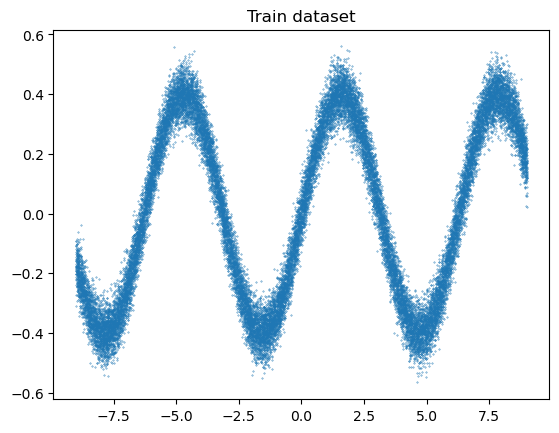

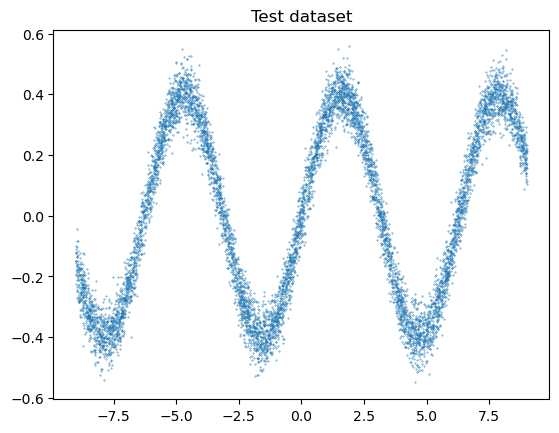

In [52]:
# Create the scatter plot
plt.scatter(dataset_train.x_data, dataset_train.y_data, s=0.1)
plt.title("Train dataset")
plt.show()

plt.scatter(dataset_test.x_data, dataset_test.y_data, s=0.1)
plt.title("Test dataset")
plt.show()

<div class="alert alert-block alert-info">

## 1.2 Design a Neural Network <a class="anchor" id="1_2"></a>

In the workshops, we have had a taste of how to train a Gradient Descent algorithm. In this task, we will build a *Shallow MLP* that can be trained to approximate a sine wave.



<div class="alert alert-block alert-info">

#### Activation functions

Starting from here you will start to create multi-layered networks with one or many "hidden" layers separated by "**activation functions**" that give our networks "**non-linearities**". If we didn't have these activation functions and simple stacked layers together, our network would be no better than a single linear layer! Why? Because multiple sequential "linear transformations" can be modeled with just a single linear transformation.

Neural networks are associated with a Directed Acyclic Graphs (DAG) describing how the functions are composed together. For example, we might have three functions $f^{(1)}, f^{(2)}$, and $f^{(3)}$, connected in a chain, to form in a chain, to form  $f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x))).$ In this case, $f^{(1)}$ is called the first layer of the network, $f^{(2)}$ is called the second layer, and so on.  The ﬁnal layer of a feedforward network is called the output layer.

Except the output layer, the behavior of the other layers is not directly speciﬁed by the training data. The learning algorithm must decide how to use those layers to produce the desired output, but the training data do not say what each individual layer should do. Instead, the learning algorithm must decide how to use these layers to best implement an approximation of $f^*$. Because the training data does not show the desired output for each of these layers, and they
are called hidden layers. These hidden layers, receive input from many other units and computes its own **activation value**. This requires us to choose the activation functions that will be used to compute the hidden layer values.

So what are these nonlinear activation functions that turn our simple linear models into a power "nonlinear function approximator"? Some common examples are:<br>
1. relu
2. sigmoid
3. tanh

Now, let's design a two layer Shallow MLP model with **one hidden layer** and **tanh** activation function using the PyTorch Lightning module. The model structure is given below:

fc1 : Linear(1 $\times$ n) $\rightarrow$ tanh $\rightarrow$ fc2 : Linear(n $\times$ 1)

Here since both the input data *x* and target value *y* are just one number, the input and output of the network are 1. And **n** is the dimension we would like to define for the hidden layer.

We are going to use the **mean squeare error loss** for our model training - [```nn.MSELoss()```](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

All models created in PyTorch Lightning need to inherit the parent class **pytorch_lightning.LightningModule**, check [this link](https://lightning.ai/docs/pytorch/stable/common/lightning_module.html) for a starter example for creating custom models using PyTorch Lightning. There are two basic functions: \_\_init__() and forward().

- In \_\_init__(), we can define the hyperparameters, the shape of each layer, etc. Same as in all python classess, this function will be called when a new instance is made.
  
- In forward(), we define the forward propagation for the model. This method is called by the object to do forward pass.

Other core functions include:

- training_step() - one complete training step that takes one batch as input, and returns a loss value at the end.

- validation_step() - one complete validation step that takes one batch as input.

- test_step() - one complete test step that takes one batch as input.

- predict_step() - one complete prediction step that takes one batch as the input, and returns the predicted labels, the true lables and the input samples.

- configure_optimizers() - define optimizers (and learning rate schedulers if needed).

In the following task, we will define all the functions mentioned above.


#### Pytorch Lightning Module

Now enough reading! Let's get to work and start implementing a MLP. The hyperparameters that you will be using are as follows:

- Learning rate of 1e-2 (remember, "1e-2 is identical to the scientific notation of 10^-2)
- Loss - MSELoss. This will be used to calculate loss for a classification task.
- MLP - One hidden layer for the MLP. You will need to figure out how to find the size of the MLP. You will also use tanh as your non-linear activiation function after the hidden layer. 
- MLP - One output layer to estimate the y value. 
- Optimizer - SGD or Adam (you can use the torch.optim library that we have already imported)

To define a Pytorch Lightning model to be trained, here you need to use the Pytorch LightningModule class as the base for defining your network. Just like the dataset class, this class has a number of important functions.

A LightningModule is a PyTorch nn.Module and it has a few more helpful methods.

In [53]:
class ShallowLinear(LightningModule):
    def __init__(self, hidden_size=[1, 64, 1], learning_rate=1e-2, optimizer="SGD"):

        super().__init__()

        # Set our init args as class attributes
        self.learning_rate = learning_rate  # Learning rate
        self.loss_fn = nn.MSELoss()
        self.optimizer = optimizer  # Optimizer

        D_in, H, D_out = hidden_size

        # define the two layers
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        # This function is an important one and we must create it or pytorch will give us an error!
        # This function defines the "forward pass" of our neural network

        # Lets define the sqeuence of events for our forward pass!
        x = self.linear1(x)
        x = nn.functional.tanh(x)

        # No activation function on the output!!
        x = self.linear2(x)

        # Note we re-use the variable x as we don't care about overwriting it
        # though in later labs we will want to use earlier hidden layers
        # later in our network!
        return x

    def training_step(self, batch, batch_idx):
        # get the x and y values of the data point
        x, y = batch

        # pass through the network
        logits = self(x)

        # Get the loss
        loss = self.loss_fn(logits, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("train_loss", loss, prog_bar=True)

        # if batch_idx == 0:
        #     print(x, y, logits, loss)

        return loss

    def validation_step(self, batch, batch_idx):
        # get the x and y values of the data point
        x, y = batch
        # pass through the network
        logits = self(x)
        # Get the loss
        loss = self.loss_fn(logits, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("val_loss", loss, prog_bar=True)

        return loss

    def test_step(self, batch, batch_idx):
        # get the x and y values of the data point
        x, y = batch
        # pass through the network
        logits = self(x)
        # Get the loss
        loss = self.loss_fn(logits, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("test_loss", loss, prog_bar=True)

        return loss

    def predict_step(self, batch, batch_idx):
        # get the x and y values of the data point
        x, y = batch
        # pass through the network
        pred = self(x)
        return pred

    def configure_optimizers(self):
        if self.optimizer == "Adam":
            # Define the optimizer with the learning rate if we choose the Adam optimizer
            optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        elif self.optimizer == "SGD":
            # Define the optimizer with the learning rate if we choose the SGD optimizer
            optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)

        return optimizer

    # def train_dataloader(self):
    #     return data_loader_train

    # def val_dataloader(self):
    #     return data_loader_val

    # def test_dataloader(self):
    #     return data_loader_test

<div class="alert alert-block alert-info">

## 1.3 Train and evaluate the network  <a class="anchor" id="1_3"></a>

Now let's do some training for the network we just created!

By using the Trainer Constructor you can train and test the model. Also Trainer will automatically enables: 
1. Tensorboard logging 
2. Model checkpointing 
3. Training and validation loop 
4. early-stopping

In this task, we will test the model performance for both optimizers:
- SGD
- ADAM

And let's train both models with **20 epoches**.

#### (a) Train with SGD

In [71]:
# Initialize Model with SGD optimizer
model_sgd = ShallowLinear(learning_rate=0.01)

# Train model for 20 epochs
trainer_task1_SGD = Trainer(
    accelerator="auto",
    devices=1 if not torch.cuda.is_available() else torch.cuda.device_count(),
    max_epochs=20,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
    logger=CSVLogger("logs", name="SGD", version=0),
)

# Start the training loop
trainer_task1_SGD.fit(model_sgd, data_loader_train)

# Evaluate Model
trainer_task1_SGD.test(model_sgd, dataloaders=data_loader_test)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/lightning_fabric/loggers/csv_logs.py:269: Experiment logs directory logs/SGD/version_0 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:652: Checkpoint directory logs/SGD/version_0/checkpoints exists and is not empty.

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | loss_fn | MSELoss | 0      | train
1 | linear1 | Linear  | 128    | train
2 | linear2 | Linear  | 65     | train
--------------------------------------------
193       Train

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss          0.009289226494729519
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.009289226494729519}]

If your implementation is correct, you should obtain a printed output similar to this:

[{'test_loss': 0.011488508433103561}]

#### (b) Train with Adam

In [72]:
# Initialize Model with Adam optimizer
model_adam = ShallowLinear(optimizer="Adam", learning_rate=0.001)

# Train model for 20 epochs
trainer_task1_ADAM = Trainer(
    accelerator="auto",
    devices=1 if not torch.cuda.is_available() else torch.cuda.device_count(),
    max_epochs=20,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
    logger=CSVLogger("logs", name="Adam", version=0),
)

# Start the training loop
trainer_task1_ADAM.fit(model_adam, data_loader_train)

# Evaluate Model
trainer_task1_ADAM.test(dataloaders=data_loader_test)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/lightning_fabric/loggers/csv_logs.py:269: Experiment logs directory logs/Adam/version_0 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:652: Checkpoint directory logs/Adam/version_0/checkpoints exists and is not empty.

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | loss_fn | MSELoss | 0      | train
1 | linear1 | Linear  | 128    | train
2 | linear2 | Linear  | 65     | train
--------------------------------------------
193       Trainable params
0         Non-trainable params
193       Total params
0.001     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at logs/Adam/version_0/checkpoints/epoch=19-step=37500-v5.ckpt
Loaded model weights from the checkpoint at logs/Adam/version_0/checkpoints/epoch=19-step=37500-v5.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           0.00481113838031888
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.00481113838031888}]

If your implementation is correct, you should obtain a printed output similar to this:

[{'test_loss': 0.005056165624409914}]

<div class="alert alert-block alert-info">

## 1.4 Visualise and Analyse the Experimental Results <a class="anchor" id="1_4"></a>

Now the training is done. Let's check how well our model has performed.

There are a few ways we can evaluate the model performance:
- Evaluate accuracy
- Inspect the loss
- Precision, recall and F1-Score
- Confusion Matrix
- And more

Let's try some of them here.

#### (a) Visual check on the approximation of the model

Visualise by generate scatter plot for the above two trained models to compare noisy datapoints and denoised (approximated) predictions.

For each model, you should plot the datapoints and the predictions (a predicted line) on the same plot.

Hint: You may need to manipulate the outputs from the model prediction, so the variable is in a proper type for the plot. You may find ```np.stack``` useful.

In [73]:
x = torch.arange(-9, 9, 0.05).reshape(-1, 1)

# Do prediction using the model with SGD
predictions_sgd = model_sgd(x)

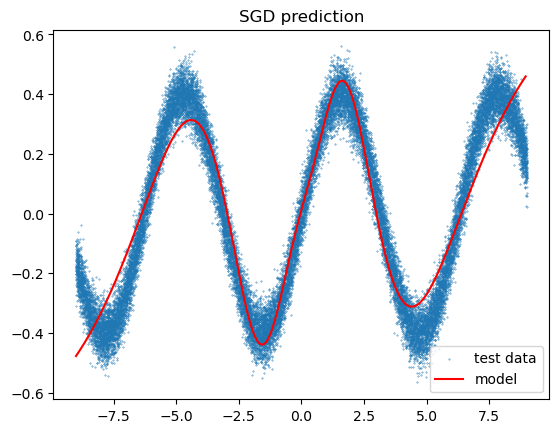

In [74]:
# Scatter plot for model trained using SGD
plt.scatter(dataset_train.x_data, dataset_train.y_data, s=0.1)
plt.plot(x, predictions_sgd.detach().numpy(), c="r")
plt.title("SGD prediction")
plt.legend(["test data", "model"])
plt.show()

In [75]:
# Do prediction using the model with Adam
x = torch.arange(-9, 9, 0.05).reshape(-1, 1)
predictions_adam = model_adam(x)

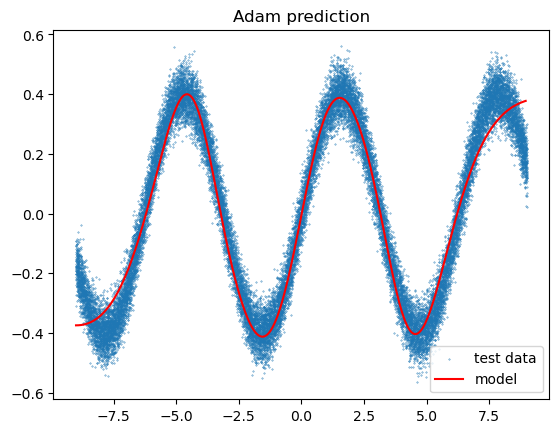

In [76]:
# Scatter plot for model trained using Adam
plt.scatter(dataset_train.x_data, dataset_train.y_data, s=0.1)
plt.plot(x, predictions_adam.detach().numpy(), c="r")
plt.legend(["test data", "model"])
plt.title("Adam prediction")
plt.show()

#### (c) Analyse the training process

Pytorch-lightning module has its own built in methods to log values. These log files can be then used to visualize experimental results. You can use python plotting libraries such as matplotlib.

Now, let's do the following:
1. Read the logs with pandas library ([pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html))
2. Using those logs, plot train losses for models trained on SGD and Adam.

Note: Make sure to drop NaN entries from dataframes before you plot using matplotlib.

In [77]:
# read logs for model trained with SGD
metrics_task_1_SGD = pd.read_csv("logs/SGD/version_0/metrics.csv")
metrics_task_1_SGD.set_index("epoch", inplace=True)  # set index
metrics_task_1_SGD = (
    metrics_task_1_SGD.groupby(level=0).sum().drop("step", axis=1)
)  # group the values properly

# read logs for model trained with Adam
metrics_task_1_Adam = pd.read_csv("logs/Adam/version_0/metrics.csv")
metrics_task_1_Adam.set_index("epoch", inplace=True)
metrics_task_1_Adam = metrics_task_1_Adam.groupby(level=0).sum().drop("step", axis=1)

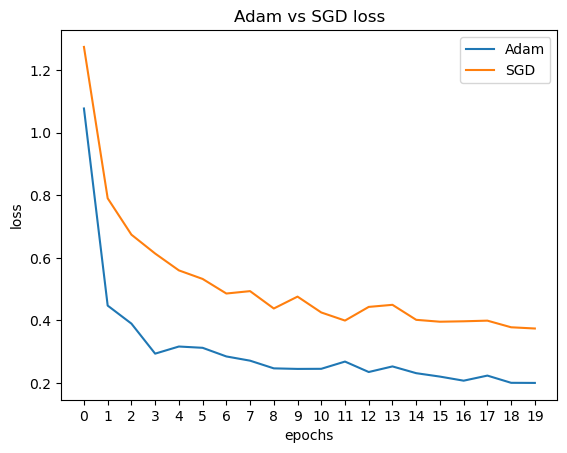

In [78]:
# Plot of the results
x = np.arange(0, 20)
plt.plot(x, metrics_task_1_Adam["train_loss"][:-1])
plt.plot(x, metrics_task_1_SGD["train_loss"][:-1])
plt.legend(["Adam", "SGD"])
plt.title("Adam vs SGD loss")
plt.xticks(np.arange(0, 20))
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

<div class="alert alert-block alert-success">

### Discussion

Please enter your answers below

**Question 1: Analysing above results, what optimizer you will choose? Explain why?**

The Adam optimiser shows much better performance compared to the SGD optimiser.
Most likely, the ability for the Adam optimiser to adjust learning rates for each weight separately allows it to more converge more quickly compared to the more basic SGD optimiser.

**Question 2: Discuss why this simple shallow network is able to denoise noisy data and approximate sine function ?**

The non-linearity introduced by the tanh function after the hidden layer gives the network the ability to converge on non-linear data sets.